<h1 style="color:#f72585;">IMDB Dataset Sentiment Analysis using RNN</h1>


## Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Bidirectional
from keras.layers import SimpleRNN, Dense, Activation

In [ ]:
import warnings

# Function to ignore warnings
def ignore_warnings():
    warnings.filterwarnings("ignore")

# Call the function to suppress warnings
ignore_warnings()

## Load training and testing data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path="imdb.npz",  # Load training and testing data
                                                      num_words=None,   # Limit the vocabulary size (None means no limit)
                                                      skip_top=0,       # Ignore the top N most frequent words
                                                      maxlen=None,      # Truncate reviews after a certain number of words
                                                      seed=113,         # Random seed for reproducibility
                                                      start_char=1,     # Character that marks the start of a sequence
                                                      oov_char=2,       # Character that replaces out-of-vocabulary words
                                                      index_from=3)     # Index from which actual words are numbered

### Explanation of Each Parameter with the Example:

* `path="imdb.npz"`:


Explanation: Specifies the file path where the IMDB dataset is stored or will be downloaded if not present.

Example: "imdb.npz" is the default file name that contains the dataset.

* `num_words=10000`:

Explanation: Limits the dataset to the top 10,000 most frequent words. This means only the 10,000 most common words in the dataset will be kept, and
the rest will be discarded.

Example: If the dataset contains 50,000 unique words, this parameter will filter out the less frequent 40,000 words.

* `skip_top=20`:

Explanation: Ignores the top 20 most frequent words. This is useful to remove very common words like "the," "and," or "is" that may not be helpful for sentiment analysis.

Example: If "the" is the most frequent word in the dataset, it will be excluded from the dataset.

* `maxlen=200`:

Explanation: Limits each review to a maximum of 200 words. If a review is longer than 200 words, it will be truncated, and if it's shorter, it will remain as is.

Example: A review with 300 words will be shortened to the first 200 words.

* `seed=42`:

Explanation: Sets the random seed for reproducibility. This ensures that every time you run the code, the dataset splits (training and testing) remain the same.

Example: Setting seed=42 ensures that the data shuffling is consistent across runs.

* `start_char=1`:

Explanation: Marks the start of each review with the character 1. This is often used as a signal to the model to indicate the beginning of a sequence.

Example: A review that starts with "I loved this movie..." will be represented as [1, 14, 56, ...] where 1 indicates the start.

* `oov_char=2`:

Explanation: Replaces any out-of-vocabulary words (those not in the top 10,000) with the character 2. This helps the model handle unknown words.

Example: If the word "fantastic" is not in the top 10,000 words, it will be replaced with 2 in the sequence.

* `index_from=3`:

Explanation: The index from which actual word indices start. This means the first word in the dataset will be indexed as 3, the second as 4, and so on.

Example: If the word "movie" is the third most frequent word, it will be indexed as 5 (3 + 2 for start_char and oov_char).

In [ ]:
# Print the type of the X_train and Y_train variables
print("Type : ", type(X_train))
print("Type : ", type(Y_train))

Type :  <class 'numpy.ndarray'>
Type :  <class 'numpy.ndarray'>


In [ ]:
# Print the shape of the X_train and Y_train variables
print("X train shape: ", X_train.shape)
print("Y train shape: ", Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


In [ ]:
# Print the shape of the X_test and Y_test variables
print("X test shape: ", X_test.shape)
print("Y test shape: ", Y_test.shape)

X test shape:  (25000,)
Y test shape:  (25000,)


## Exploratory Data Analysis

In [ ]:
# Print the unique values in the Y_train and Y_test variables
print("Y train values : ", np.unique(Y_train))
print("Y test values : ", np.unique(Y_test))

Y train values :  [0 1]
Y test values :  [0 1]


In [ ]:
# Get unique values and their counts in the Y_train variable
unique, counts = np.unique(Y_train, return_counts = True)
# Print the distribution of classes in the Y_train variable
print("Y train distribution: ", dict(zip(unique, counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [ ]:
# Get unique values and their counts in the Y_test variable
unique, counts = np.unique(Y_test, return_counts = True)
# Print the distribution of classes in the Y_test variable
print("Y test distribution: ", dict(zip(unique, counts)))

Y test distribution:  {0: 12500, 1: 12500}


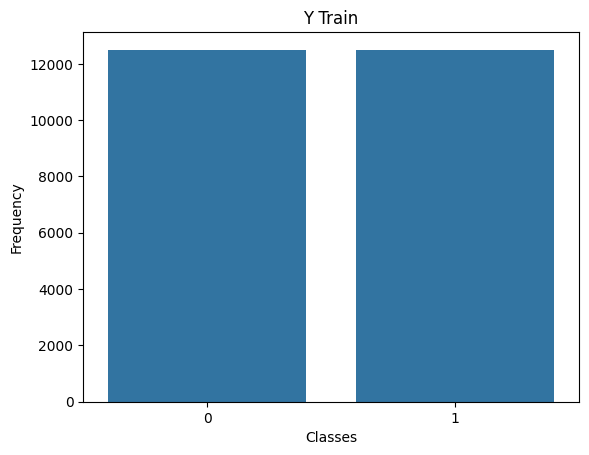

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from Y_train
df = pd.DataFrame({'Y_train': Y_train})

# Create the count plot
plt.figure()
sns.countplot(x='Y_train', data=df)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y Train")
plt.show()

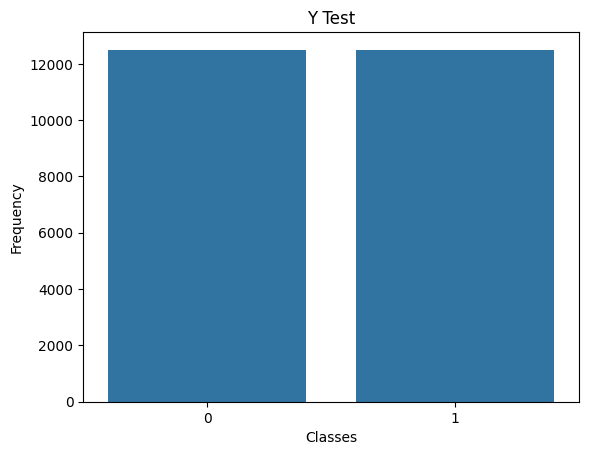

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from Y_train
df = pd.DataFrame({'Y_test': Y_test})

# Create the count plot
plt.figure()
sns.countplot(x='Y_test', data=df)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y Test")
plt.show()

In [ ]:
# Extract the first sample from X_train
insideX = X_train[0]

# Print the contents of the first sample
print(insideX)

# Print the size of the first sample
print("size of X_train[0]: ", len(insideX))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
size of X_train[0]:  218


In [ ]:
# Initialize lists to store the lengths of reviews in the training and test sets
review_len_train = []
review_len_test = []

# Iterate through pairs of reviews from X_train and X_test
for rev1, rev2 in zip(X_train, X_test):
    # Append the length of the review from X_train to the review_len_train list
    review_len_train.append(len(rev1))
    # Append the length of the review from X_test to the review_len_test list
    review_len_test.append(len(rev2))

In [ ]:
# Calculate the length of each review in X_train and store it in review_len_train
review_len_train = [len(rev) for rev in X_train]
# Calculate the length of each review in X_test and store it in review_len_test
review_len_test = [len(rev) for rev in X_test]

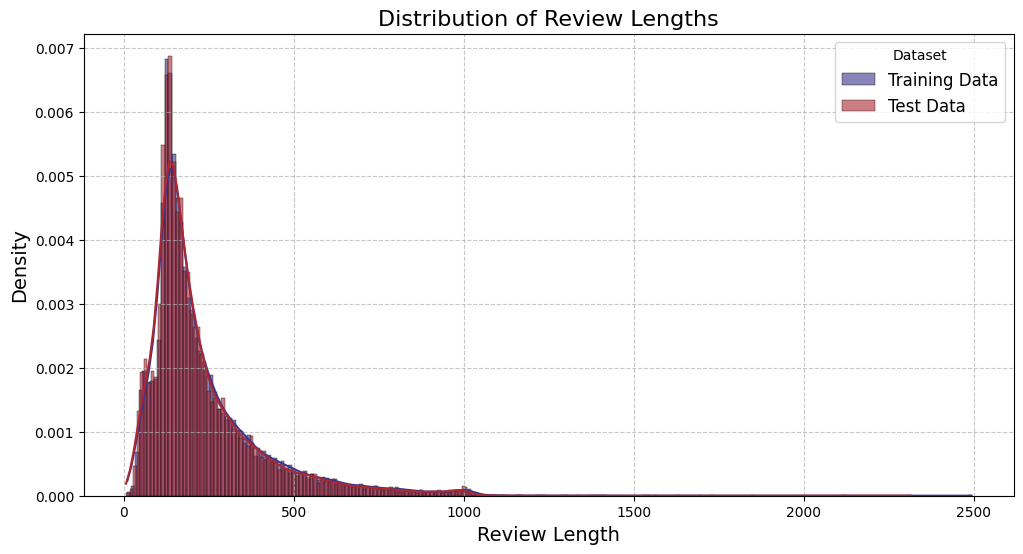

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot training data distribution
sns.histplot(review_len_train, color='#3d348b', kde=True, stat='density', alpha=0.6, label='Training Data')

# Plot test data distribution
sns.histplot(review_len_test, color='#ad2831', kde=True, stat='density', alpha=0.6, label='Test Data')

# Customize plot
plt.title('Distribution of Review Lengths', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Dataset', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Calculate and print the mean length of reviews in the training set
print("Train mean: ", np.mean(review_len_train))

# Calculate and print the median length of reviews in the training set
print("train median: ", np.median(review_len_train))

# Calculate and print the mode length of reviews in the training set
print("Train mode: ", stats.mode(review_len_train))

Train mean:  238.71364
train median:  178.0
Train mode:  ModeResult(mode=132, count=196)


* `np.mean(review_len_train)`:

This calculates the mean (average) length of reviews in the review_len_train list. The mean provides a measure of the central tendency of the review lengths.

* `np.median(review_len_train)`:

This calculates the median length of reviews in the review_len_train list. The median represents the middle value when the review lengths are sorted, providing a measure of central tendency that is less sensitive to extreme values than the mean.

* `stats.mode(review_len_train)`:

This calculates the mode (most frequent value) of the review lengths in the review_len_train list. stats.mode() returns a ModeResult object containing the mode value(s) and their count(s). By default, it returns the smallest mode if there are multiple.

In [ ]:
# Get the word index dictionary from the IMDB dataset
word_index = imdb.get_word_index()


# Print the type of the word_index variable
print(type(word_index))

# Print the number of entries in the word_index dictionary
print(len(word_index))

<class 'dict'>
88584


### Explanation:

* `word_index = imdb.get_word_index()`:

This line retrieves the word index dictionary from the IMDB dataset. This dictionary maps words to integer indices, which are used for tokenization in the dataset.

* `print(type(word_index))`:

This prints the type of the word_index variable. It should be a dictionary (<class 'dict'>), which maps words to their corresponding integer indices.

* `print(len(word_index))`:

This prints the number of entries in the word_index dictionary. It gives you an idea of how many unique words are in the dataset's vocabulary.

The word_index dictionary is essential for converting words to integer tokens and vice versa. Understanding its size and type helps us gauge the vocabulary complexity and tokenization process in your dataset.

In [ ]:
# Iterate through the items (key-value pairs) in the word_index dictionary
for keys, values in word_index.items():
    # Check if the value (integer index) is equal to 5
    if values == 5:
        # Print the word (key) corresponding to the integer index 5
        print( "The integer", values, "corresponds for the word: ", keys)

The integer 5 corresponds for the word:  to


### Explanation:

* `for keys, values in word_index.items()`:

This loop iterates over each key-value pair in the word_index dictionary. keys represent words, and values are their corresponding integer indices.

* `if values == 5`:

This condition checks if the integer index (values) is equal to 5.

* `print("The integer", values, "corresponds to the word:", keys)`:

If the condition is met, this line prints the word (keys) that corresponds to the integer index 5. This helps you identify which word is represented by the index 5 in the dataset.

This code snippet is useful for inspecting the mapping between integer indices and words in your vocabulary, especially if you need to understand or verify specific tokens.

In [ ]:
def WhatItSay(index):
    # Create a reverse mapping from integer indices to words
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])

    # Decode the review at the given index from X_train
    # The get(i - 3, "!") handles possible out-of-vocabulary tokens
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])

    # Print the decoded review
    print(decode_review)

    # Print the label of the review (sentiment)
    print(Y_train[index])

    # Return the decoded review
    return decode_review

# Decode and print the review at index 39
decode_review = WhatItSay(39)

! this so called remake is terrible i went to see this tonight on the first day as the anticipation and hype was too much for me to handle but within the first half an hour we knew that this is a disaster it not only does not match the hype created but also insults the original blockbuster the script had loopholes the editing was untidy quite a few times mohanlal who is an excellent actor did an okay job amitabh was alright the director wanted to portray how evil his character is but he went a bit overboard which resulted in it being forceful ajay who is especially smooth in these kind of roles was also a disappointment lets not even get started about the new guy prashant one wouldn't be proud to start off a career with something like this rajpal yadav who was thrown in for a few laughs couldn't even get a smile out of anyone because of his forceful humor and the shrill voice nisha kothari proved that she is one of the worst actresses we have today all in all rgv who i thought was one 

### Explanation:

* `reverse_index = dict([(value, key) for (key, value) in word_index.items()])`:

This line creates a reverse mapping of the word_index dictionary. In word_index, words are keys and integer indices are values. reverse_index swaps these, making integer indices the keys and words the values.

* `decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])`:

This line decodes the review at the specified index from X_train. Each token in the review (represented as an integer) is looked up in reverse_index to get the corresponding word. i - 3 is used to adjust the token indices (this adjustment may be necessary depending on how the dataset and tokenization are processed; if -3 is not applicable, adjust accordingly). If a token index is not found in reverse_index, it defaults to "!".

* `print(decode_review)`:

This prints the decoded review as a readable string of words.

* `print(Y_train[index])`:

This prints the label (sentiment) of the review at the specified index, showing whether it's positive or negative.

* `return decode_review`:

This returns the decoded review string from the function.

Usage:

* `decode_review = WhatItSay(39)`:

Calls the WhatItSay function for the review at index 39 in X_train, prints the decoded review and its sentiment, and stores the decoded review in decode_review.

This function helps to visualize and understand individual reviews by converting token IDs back into readable text and provides insight into the corresponding sentiment label.

In [ ]:
# Define the number of words to keep in the vocabulary
num_words = 15000


# Load the IMDB dataset with a vocabulary limit of num_words
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = num_words)

# Define the maximum length of the sequences
maxlen = 130

# Pad sequences to ensure they all have the same length
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

# Print the content of the 6th training example (index 5)
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


### Explanation:

`num_words = 15000`:

Specifies that only the top 15,000 most frequent words should be kept in the vocabulary. Words outside this range will be excluded from the dataset.

`(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)`:

Loads the IMDB dataset, limiting the vocabulary to num_words. This function returns tuples of training and test data.

`maxlen = 130`:

Sets the maximum length of the sequences (reviews). Reviews longer than this will be truncated, and reviews shorter than this will be padded.

`X_train = pad_sequences(X_train, maxlen=maxlen)`:

Pads all training sequences to a uniform length of maxlen (130 tokens). This ensures all sequences have the same length, which is important for processing by neural networks.

`X_test = pad_sequences(X_test, maxlen=maxlen)`:

Similarly pads all test sequences to the length of maxlen.

`print(X_train[5])`:

Prints the content of the 6th training sample (index 5). This output will be a list of integers, each representing a token in the padded sequence.

By padding sequences and limiting the vocabulary, we standardize the input data for consistent processing and model training.

In [ ]:
# Iterate over the first 10 reviews in the training set
for i in X_train[0:10]:
    # Print the length of each review
    print(len(i))

130
130
130
130
130
130
130
130
130
130


### Explanation:

* `for i in X_train[0:10]`:

This loop iterates over the first 10 reviews in the X_train dataset. Each review is represented as a sequence of integers (tokens).

* `print(len(i))`:
For each review in the loop, this line prints the length of the review. Since the sequences have been padded to a uniform length of maxlen (130), each review should have the same length. However, if the padding was not correctly applied or if there was an issue with the padding, this will help you verify if all sequences are indeed of the expected length.

This code helps confirm that your padding operation was applied correctly and that all reviews in the specified range have the correct length.

In [ ]:
decoded_review = WhatItSay(36)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


## Create model 1

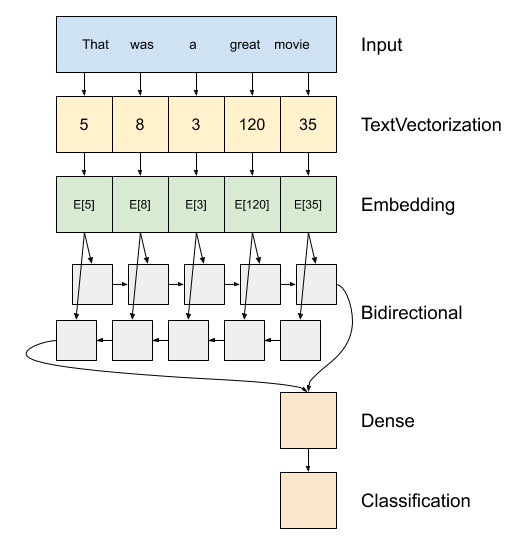

In [ ]:
from IPython.display import Image

# Display the image
Image("bidirectional.png")

* Above is a diagram of the model.

This model can be build as a tf.keras.Sequential.

The first step is the encoder, which converts the text to a sequence of token indices.

After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

The tf.keras.layers.Bidirectional wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output.

The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.

The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

After the RNN has converted the sequence to a single vector the two layers.Dense do some final processing, and convert from this vector representation to a single logit as the classification output.

The code to implement this is below:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Activation

# Define the model
rnn = Sequential()

# Embedding Layer with mask_zero to handle padding
rnn.add(Embedding(input_dim=num_words, output_dim=64, input_length=maxlen, mask_zero=True))

# Bidirectional LSTM Layer
rnn.add(Bidirectional(LSTM(64)))

# Dense Layer with relu activation
rnn.add(Dense(64, activation='relu'))

# Dropout Layer to prevent overfitting
rnn.add(Dropout(0.5))

# Output Layer for binary classification with sigmoid activation
rnn.add(Dense(1, activation='sigmoid'))

# Display model architecture
print(rnn.summary())

# Compile the model
rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## Train the first RNN model

In [ ]:
history = rnn.fit(
    X_train,                  # Training data
    Y_train,                  # Training labels
    validation_data = (X_test, Y_test),  # Data for validation during training
    epochs = 12,                 # Number of epochs to train
    batch_size = 128,           # Number of samples per gradient update
    verbose = 1                 # Verbosity mode (1 = progress bar)
)

Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 148s 726ms/step - accuracy: 0.5747 - loss: 0.6642 - val_accuracy: 0.8144 - val_loss: 0.4367
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 199s 707ms/step - accuracy: 0.8310 - loss: 0.3939 - val_accuracy: 0.8620 - val_loss: 0.3181
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 152s 776ms/step - accuracy: 0.8731 - loss: 0.3129 - val_accuracy: 0.8682 - val_loss: 0.3075
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 202s 774ms/step - accuracy: 0.8983 - loss: 0.2560 - val_accuracy: 0.8653 - val_loss: 0.3187
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 720ms/step - accuracy: 0.9136 - loss: 0.2296 - val_accuracy: 0.8443 - val_loss: 0.3602
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 718ms/step - accuracy: 0.9263 - loss: 0.1951 - val_accuracy: 0.8502 - val_loss: 0.4092
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 140s 707ms/step - accuracy: 0.9370 - loss: 0.1629 - val_accuracy: 0.8454 - val_loss: 0.4268
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 711ms/step - accuracy: 0.9480 -

In [ ]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy :", score[1] * 100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8508 - loss: 0.7730
Accuracy : 85.21199822425842


In [ ]:
# Save the first model
rnn.save('rnn_model_1.keras')

In [ ]:
# Load model saved in Keras format
from keras.models import load_model
model1 = load_model('rnn_model_1.keras')

## Model 1 evaluation

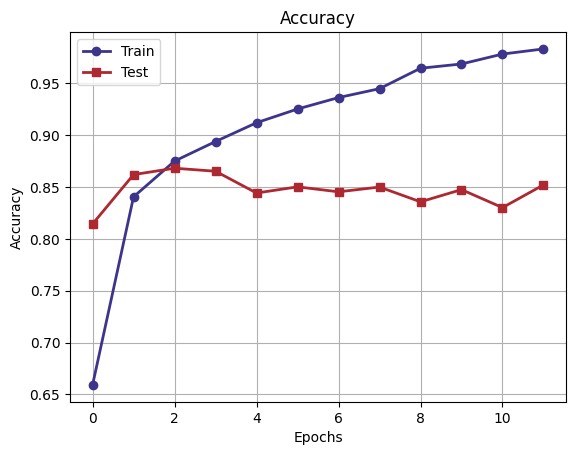

In [ ]:
# Create a new figure for the accuracy plot
plt.figure()

# Plot training accuracy
plt.plot(history.history["accuracy"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Accuracy")  # Title of the plot
plt.xlabel("Epochs")   # Label for the x-axis
plt.ylabel("Accuracy") # Label for the y-axis
plt.legend()           # Show legend to differentiate between train and test
plt.grid(True)         # Add grid lines for better readability
plt.show()             # Display the plot

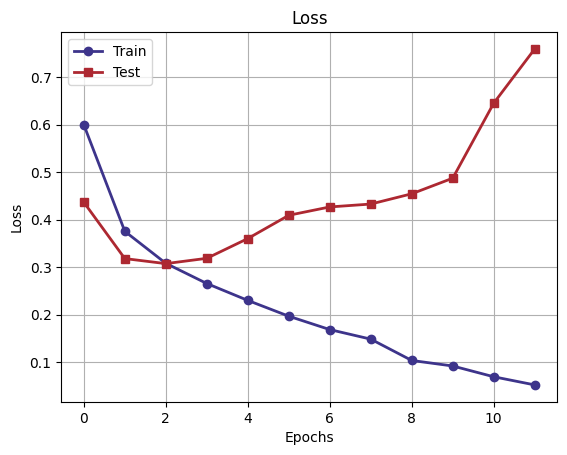

In [ ]:
# Create a new figure for the loss plot
plt.figure()

# Plot training loss
plt.plot(history.history["loss"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation loss
plt.plot(history.history["val_loss"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Loss")      # Title of the plot
plt.xlabel("Epochs")  # Label for the x-axis
plt.ylabel("Loss")    # Label for the y-axis
plt.legend()          # Show legend to differentiate between train and test
plt.grid(True)        # Add grid lines for better readability
plt.show()            # Display the plot

### Stack two or more LSTM layers
Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

If False it returns only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). This is the default, used in the previous model.

If True the full sequences of successive outputs for each timestep is returned (a 3D tensor of shape `(batch_size, timesteps, output_features))`.

Here is what the flow of information looks like with `return_sequences=True`:

The interesting thing about using an `RNN` with `return_sequences=True` is that the output still has 3-axes, like the input, so it can be passed to another RNN layer, like this:

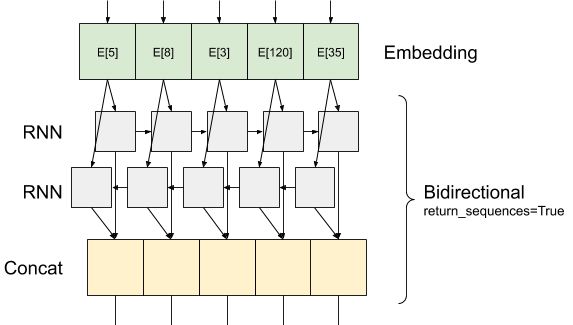

In [ ]:
from IPython.display import Image

# Display the image
Image("layered_bidirectional.png")

In [ ]:
# Define the model
rnn = Sequential()

# Embedding Layer with mask_zero to handle padding
rnn.add(Embedding(input_dim = num_words, output_dim = 64, input_length = maxlen, mask_zero=True))


# First Bidirectional LSTM Layer with return_sequences=True
rnn.add(Bidirectional(LSTM(64, return_sequences=True)))

# Second Bidirectional LSTM Layer (default return_sequences=False)
rnn.add(Bidirectional(LSTM(32)))

# Dense Layer with relu activation
rnn.add(Dense(64, activation='relu'))

# Dropout Layer to prevent overfitting
rnn.add(Dropout(0.5))

# Output Layer for binary classification
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


# Train the second RNN model

In [ ]:
history = rnn.fit(
    X_train,                  # Training data
    Y_train,                  # Training labels
    validation_data=(X_test, Y_test),  # Data for validation during training
    epochs = 12,                 # Number of epochs to train
    batch_size = 128,           # Number of samples per gradient update
    verbose=1                 # Verbosity mode (1 = progress bar)
)


Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.5925 - loss: 0.6449 - val_accuracy: 0.8385 - val_loss: 0.3657
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8292 - loss: 0.3947 - val_accuracy: 0.8421 - val_loss: 0.3635
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.8719 - loss: 0.3150 - val_accuracy: 0.8687 - val_loss: 0.3432
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8947 - loss: 0.2648 - val_accuracy: 0.8382 - val_loss: 0.3597
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.9147 - loss: 0.2209 - val_accuracy: 0.8564 - val_loss: 0.3475
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9323 - loss: 0.1829 - val_accuracy: 0.8604 - val_loss: 0.3780
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.9449 - loss: 0.1507 - val_accuracy: 0.8386 - val_loss: 0.5217
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.9629 - loss: 0.1074 - val_accu

In [ ]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy :", score[1] * 100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8349 - loss: 0.8428
Accuracy : 83.81199836730957


In [ ]:
# Save the first model
rnn.save("model2.keras")

## Model 2 evaluation

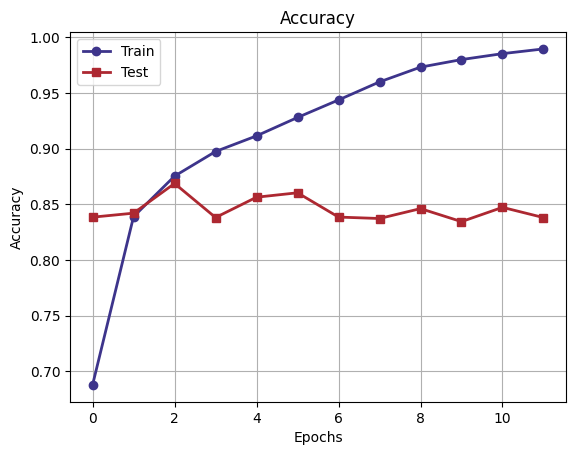

In [ ]:
# Create a new figure for the accuracy plot
plt.figure()

# Plot training accuracy
plt.plot(history.history["accuracy"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Accuracy")  # Title of the plot
plt.xlabel("Epochs")   # Label for the x-axis
plt.ylabel("Accuracy") # Label for the y-axis
plt.legend()           # Show legend to differentiate between train and test
plt.grid(True)         # Add grid lines for better readability
plt.show()             # Display the plot

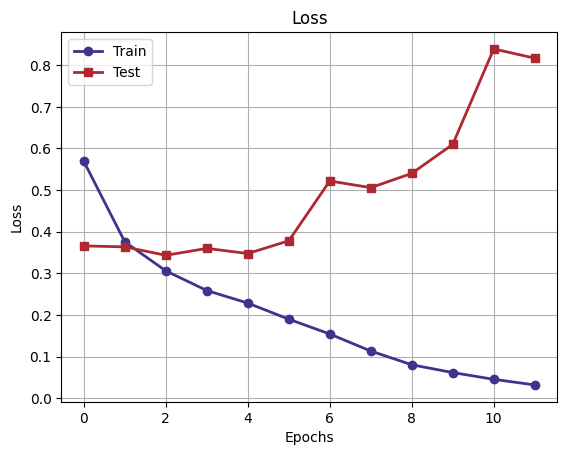

In [ ]:
# Create a new figure for the loss plot
plt.figure()

# Plot training loss
plt.plot(history.history["loss"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation loss
plt.plot(history.history["val_loss"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Loss")      # Title of the plot
plt.xlabel("Epochs")  # Label for the x-axis
plt.ylabel("Loss")    # Label for the y-axis
plt.legend()          # Show legend to differentiate between train and test
plt.grid(True)        # Add grid lines for better readability
plt.show()            # Display the plot

# Train the Third RNN model

In [ ]:
# Initialize a Sequential model, which will be a stack of layers.
rnn = Sequential()

# Add an Embedding layer that converts integer indices (word IDs) into dense vectors of fixed size (32).
# `num_words` is the size of the vocabulary, and `input_length` is the length of each input sequence.

rnn.add(Embedding(num_words, 32, input_length=len(X_train[0])))


# Add a SimpleRNN layer with 16 units.
# `input_shape` specifies the expected input shape (number of words, maximum length of sequences).
# `return_sequences=False` indicates that the output of the last time step will be returned (not the entire sequence).
# `activation="relu"` applies the ReLU activation function to the output.

rnn.add(SimpleRNN(16, input_shape=(num_words, maxlen), return_sequences=False, activation="relu"))


# Add a Dense (fully connected) layer with 1 unit, which will output a single value.
# This is typically used for binary classification.

rnn.add(Dense(1))


# Apply the sigmoid activation function to the output, squashing the output to a value between 0 and 1, suitable for binary classification.

rnn.add(Activation("sigmoid"))


# Print a summary of the model architecture, showing each layer, its output shape, and the number of parameters.

print(rnn.summary())

# Compile the model with the binary cross-entropy loss function (suitable for binary classification),
# using the RMSprop optimizer, and track the accuracy metric during training.

rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## RMSprop (Root Mean Square Propagation)

RMSprop (Root Mean Square Propagation) is an optimization algorithm used to train neural networks. It's designed to adaptively adjust the learning rate of each parameter, which helps in speeding up the training process and improving convergence, especially in deep networks.

#### Key Features of RMSprop:

* Adaptive Learning Rate:

RMSprop maintains a moving average of the squared gradients for each parameter.
The learning rate for each parameter is then divided by the square root of this moving average, effectively normalizing the gradients. This means that parameters with larger gradients will have their updates scaled down, while those with smaller gradients will have larger updates. This helps in stabilizing the training process.

* Efficient for Non-Stationary Objectives:

RMSprop is particularly useful for problems where the learning objectives (loss landscape) change rapidly or have noisy gradients. The algorithm adjusts to these changes dynamically, which makes it more robust compared to simple gradient descent.

* Decay Factor:

RMSprop introduces a decay factor (typically denoted as rho or β) to control how much of the past gradients influence the current update. This is similar to momentum in other optimizers.


#### Advantages of RMSprop:
Prevents Oscillations: By scaling the learning rate based on recent gradients, RMSprop helps prevent large oscillations in the learning process.
Effective for Deep Networks: RMSprop is well-suited for training deep neural networks, where the gradients can vary significantly across layers.
Reduces Need for Tuning: RMSprop reduces the need to manually adjust the learning rate during training, as it adapts automatically.

#### Common Use:
RMSprop is often used as a default optimizer in many deep learning tasks, particularly in cases where the learning rate needs to adapt to different scales of gradients, making it a popular choice for training recurrent neural networks (RNNs) and convolutional neural networks (CNNs).

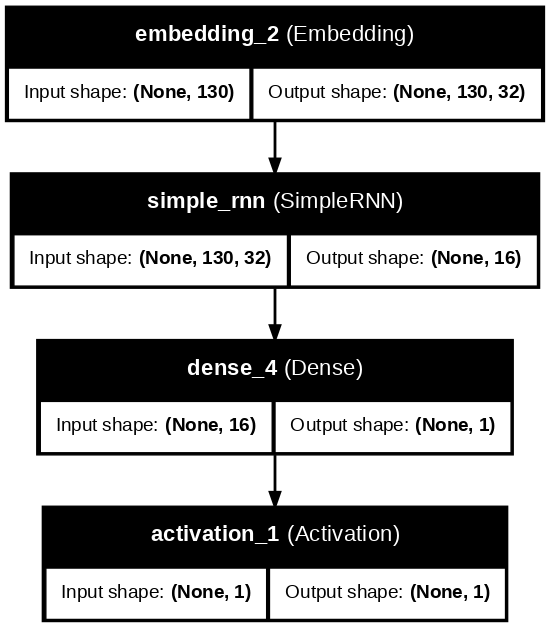

In [ ]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture with a smaller image size
plot_model(rnn, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=100)

In [ ]:
history = rnn.fit(
    X_train,                  # Training data
    Y_train,                  # Training labels
    validation_data=(X_test, Y_test),  # Data for validation during training
    epochs = 12,                 # Number of epochs to train
    batch_size = 128,           # Number of samples per gradient update
    verbose=1                 # Verbosity mode (1 = progress bar)
)


Epoch 1/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.5566 - loss: 0.6862 - val_accuracy: 0.7000 - val_loss: 0.6348
Epoch 2/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.7579 - loss: 0.5586 - val_accuracy: 0.8045 - val_loss: 0.4517
Epoch 3/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8182 - loss: 0.4368 - val_accuracy: 0.8275 - val_loss: 0.4002
Epoch 4/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8481 - loss: 0.3629 - val_accuracy: 0.8339 - val_loss: 0.3806
Epoch 5/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8688 - loss: 0.3279 - val_accuracy: 0.8231 - val_loss: 0.4094
Epoch 6/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.8847 - loss: 0.2965 - val_accuracy: 0.8256 - val_loss: 0.4047
Epoch 7/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8910 - loss: 0.2788 - val_accuracy: 0.8332 - val_loss: 0.3779
Epoch 8/12
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9040 - loss: 0.2551 - 

In [ ]:
score = rnn.evaluate(X_test, Y_test)
print("Accuracy :", score[1] * 100)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8291 - loss: 0.4319
Accuracy : 83.24000239372253


In [ ]:
# Save the third model
rnn.save("model3.keras")

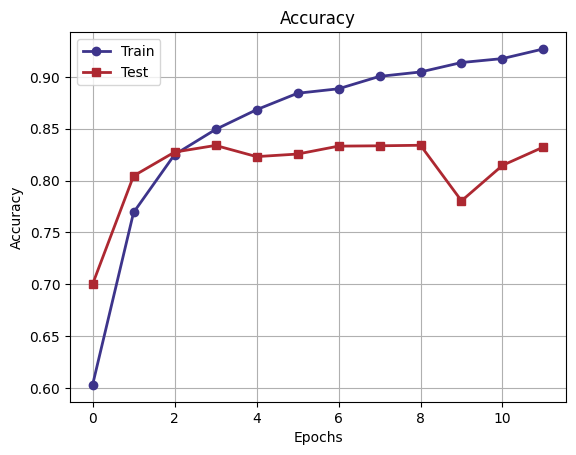

In [ ]:
# Create a new figure for the accuracy plot
plt.figure()

# Plot training accuracy
plt.plot(history.history["accuracy"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation accuracy
plt.plot(history.history["val_accuracy"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Accuracy")  # Title of the plot
plt.xlabel("Epochs")   # Label for the x-axis
plt.ylabel("Accuracy") # Label for the y-axis
plt.legend()           # Show legend to differentiate between train and test
plt.grid(True)         # Add grid lines for better readability
plt.show()

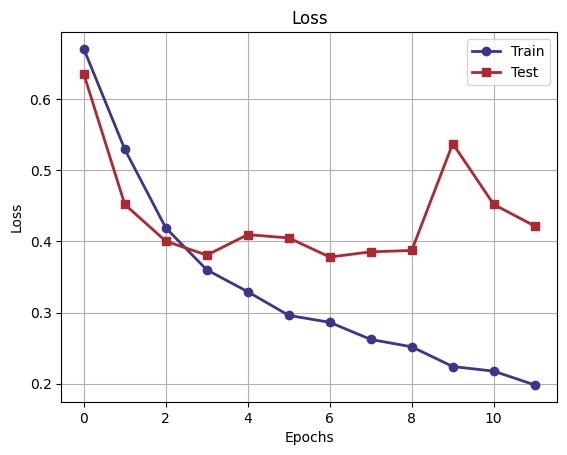

In [ ]:
# Create a new figure for the loss plot
plt.figure()

# Plot training loss
plt.plot(history.history["loss"], label="Train", color="#3d348b", linewidth=2, marker='o')
# Plot validation loss
plt.plot(history.history["val_loss"], label="Test", color="#ad2831", linewidth=2, marker='s')

# Add title, labels, and legend to the plot
plt.title("Loss")      # Title of the plot
plt.xlabel("Epochs")  # Label for the x-axis
plt.ylabel("Loss")    # Label for the y-axis
plt.legend()          # Show legend to differentiate between train and test
plt.grid(True)        # Add grid lines for better readability
plt.show()            # Display the plot

## Comparative Analysis of RNN Architectures for Sentiment Classification in IMDB Movie Reviews

This section presents a comparative analysis of three different RNN-based models trained to classify sentiment in IMDB movie reviews. Each model's architecture and corresponding performance are evaluated to determine the most effective approach for this NLP task.

### Model 1:

* Architecture: Embedding → Bidirectional LSTM → Dense → Dropout → Dense

* Accuracy: 85.21%

* Analysis: Model 1 leverages a Bidirectional LSTM layer to capture context from both directions of the text, making it particularly effective for understanding complex sentence structures in movie reviews. The Dropout layer helps prevent overfitting, contributing to the model's strong generalization and highest accuracy among the three models.

### Model 2:

Architecture: Embedding → Bidirectional LSTM (return_sequences=True) → Bidirectional LSTM → Dense → Dropout → Dense

Accuracy: 83.81%

Analysis: Model 2 introduces an additional Bidirectional LSTM layer, intended to enhance the model's ability to capture nuanced patterns in the text. However, this increased complexity may have led to overfitting or optimization challenges, resulting in a slightly lower accuracy compared to Model 1.

### Model 3:

Architecture: Embedding → SimpleRNN → Dense → Activation

Accuracy: 83.24%

Analysis: Model 3, the simplest of the three, employs a SimpleRNN layer. While less resource-intensive, SimpleRNNs are less capable of capturing long-term dependencies in text, which is likely why this model achieved the lowest accuracy. This architecture may miss critical context needed for accurate sentiment classification in the more complex language of IMDB reviews.
Conclusion: Model 1's architecture, combining a Bidirectional LSTM with a Dropout layer, provides the best balance between complexity and performance, making it the most effective choice for sentiment classification in IMDB movie reviews. Model 2, while potentially more powerful, may require further tuning to avoid overfitting. Model 3, with its simpler structure, is less effective for this task, particularly when dealing with longer, more complex sentences.









## Refrences

https://www.kaggle.com/code/tanyildizderya/imdb-dataset-sentiment-analysis-using-rnn

https://www.tensorflow.org/text/tutorials/text_classification_rnn